Improve AI for your start-up
-----------------

**In this project we will work with the yelp business and review dataset to detect the customer dissatisfaction. We we basically use unsupervised learning to do this. We will use the TF-IDF.**

In [1]:
import numpy as np 
import pandas as pd # 
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import date,datetime
#from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn import cluster, metrics
from yellowbrick.cluster import KElbowVisualizer
# To train word2vec
from gensim.models import Word2Vec
import textblob as tb
from textblob import TextBlob, Word
from gensim import models, matutils
from pprint import pprint
# To extract n-gram from text
from gensim.models.phrases import Phrases, Phraser
from sklearn import manifold, decomposition
from collections import defaultdict
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [2]:
reviews = pd.read_json('yelpdata/yelp_academic_dataset_review.json', lines=True, chunksize = 20000)
for review in reviews:
    print(review)
    break

                    review_id                 user_id             business_id  \
0      lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1      8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2      NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3      T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4      sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   
...                       ...                     ...                     ...   
19995  XC0iZgKMK0_zRk9vDKUhNg  nZINe2ni7oR-AxyB7XzVwA  uJFnuF_nYebV_bfNsoGPrQ   
19996  ZiYsh-I7Ebsu-6-yHJ52Lw  tyN5FVSYgYTh_JAVKyTZag  vUvMI4xCOOvUK8XkbZNNVw   
19997  Zwhvxg8meUBOP54ZZ5Dnuw  KBF8F9gANiBZZLNaCEy2fQ  F5_NonP-uoq4v3qplmjiLA   
19998  aziqkO_0sm2QdB8Yyh44pw  fUhotHRxeDI13_v1v7yllA  EBIxeySmja_aCq698sVggQ   
19999  _yNqY-oo8hQDUG_gNee3bA  C9aI3K7zCq4egw6d_bx0pQ  7_gpvwLDk2M0Ztvw6z28vA   

       stars  useful  funny

In [3]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [4]:
#review["date"]=  pd.to_datetime(review["date"], format='%Y-%m-%d')


review['date'] = pd.to_datetime(review['date']).dt.date

In [5]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28


In [6]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [7]:
businesss = pd.read_json('yelpdata/yelp_academic_dataset_business.json', lines=True, chunksize = 20000)
for business in businesss:
    print(business)
    break

                  business_id                        name  \
0      6iYb2HFDywm3zjuRg0shjw         Oskar Blues Taproom   
1      tCbdrRPZA0oiIYSmHG3J0w     Flying Elephants at PDX   
2      bvN78flM8NLprQ1a1y5dRg              The Reclaimory   
3      oaepsyvc0J17qwi8cfrOWg                 Great Clips   
4      PE9uqAjdw0E4-8mjGl3wVA           Crossfit Terminus   
...                       ...                         ...   
19995  Q4BSpLqBsR1v-d2KfzNqHg           Boston Bark Mulch   
19996  xeryhbJ44aJIWY0kqTKItg  Orchards Express Auto Care   
19997  0TOWPTTqW3aL_Dgh2WwYKw                 Scioto Park   
19998  2hC_n_CezRLjd7T3G82KIA     Bedrosians Tile & Stone   
19999  v_vhixDAOD50PkU0_rKHzQ             J&L Hair Studio   

                           address         city state postal_code   latitude  \
0                     921 Pearl St      Boulder    CO       80302  40.017544   
1              7000 NE Airport Way     Portland    OR       97218  45.588906   
2               4720 Hawtho

In [8]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [9]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [10]:
business = business[['business_id', 'name', 'is_open', 'categories']]
business.head()

,business_id,name,is_open,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,1,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,1,"Antiques, Fashion, Used, Vintage & Consignment..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,1,"Beauty & Spas, Hair Salons"
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1,"Gyms, Active Life, Interval Training Gyms, Fit..."


## Let us merge the business and review datasets

In [11]:
review_bus = pd.merge(review, business, how = 'left', left_on = 'business_id', right_on = 'business_id')
review_bus.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,is_open,categories
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11,Prides Osteria,0,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03,Target,1,"Department Stores, Optometrists, Home & Garden..."
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28,Willamette Valley Moving,1,"Home Services, Packing Services, Movers"
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08,Renaissance Orlando at SeaWorld,1,"Hotels, Hotels & Travel, Restaurants, Event Pl..."
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28,Brasserie Ten Ten,0,"Restaurants, French"


In [12]:
review_bus.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
name           0
is_open        0
categories     1
dtype: int64

In [13]:
review_bus=review_bus.dropna()

In [14]:
review_bus=review_bus[review_bus['categories'].str.contains('Restaurants')]

In [15]:
review_bus['business_id'].value_counts()

bZiIIUcpgxh8mpKMDhdqbA    150
H_RM2u1WWGU1HkKZrYq2Ow    109
oz882XuZCxajKo64Opgq_Q     84
VPqWLp9kMiZEbctCebIZUA     71
jREzLrIEkc4jQKLfYMJ0gg     67
                         ... 
NYeVpGP_w3Eh2sPovDXO6A      1
Z7aBFdCfB5NhCarXZegHRw      1
xfJvSrIMFN8kLXVuKNPWKg      1
boxxtYkfzxYOzYto-wqNeA      1
VrOzEdPg53-iv_ce9642hw      1
Name: business_id, Length: 2943, dtype: int64

In [16]:
review_bus.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'is_open', 'categories'],
      dtype='object')

In [17]:
review_bus.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,is_open,categories
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11,Prides Osteria,0,"Restaurants, Wine Bars, Nightlife, Farmers Mar..."
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08,Renaissance Orlando at SeaWorld,1,"Hotels, Hotels & Travel, Restaurants, Event Pl..."
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28,Brasserie Ten Ten,0,"Restaurants, French"
5,J4a2TuhDasjn2k3wWtHZnQ,RNm_RWkcd02Li2mKPRe7Eg,xGXzsc-hzam-VArK6eTvtw,1,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21,The Burren,1,"Restaurants, Bars, Irish Pub, Food, Pubs, Amer..."
6,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2,0,0,0,"The setting is perfectly adequate, and the foo...",2006-04-16,Linwood Grill & BBQ Restaurant,0,Restaurants


In [18]:
review_bus.shape

(13946, 12)

In [19]:
review_bus.duplicated().sum()

0

In [20]:
review_bus.to_csv('restau.csv', index=False)

#### Exploratory Analysis

Top 10 reviewed restau in Yelp

In [21]:
top_restaurants = review_bus.name.value_counts().index[:10].tolist()
top_restaurants

['Hopdoddy Burger Bar',
 'Blue Star Donuts',
 'Barking Crab',
 'Medina Cafe',
 'South Congress Cafe',
 "Gus's World Famous Fried Chicken",
 "Santarpio's Pizza",
 'FLIP burger boutique',
 'Myers & Chang',
 'Saus']

In [22]:
review_top = review_bus.loc[review_bus['name'].isin(top_restaurants)]
review_top.shape

(748, 12)

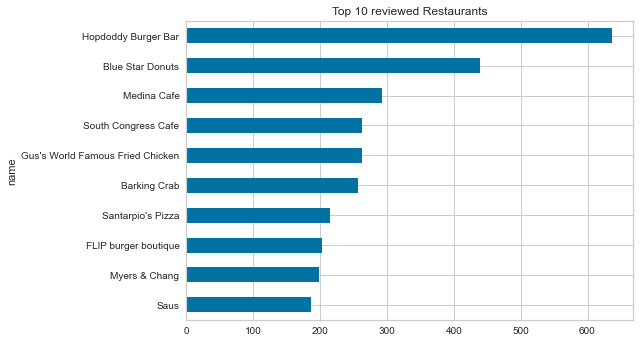

In [23]:
review_top.groupby(review_top.name)['stars'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 reviewed Restaurants');

In [24]:
review_top_useful=review_top.groupby(review_top.name)[['useful','funny', 'cool']].sum().sort_values('useful',
                                                                                             ascending=True)

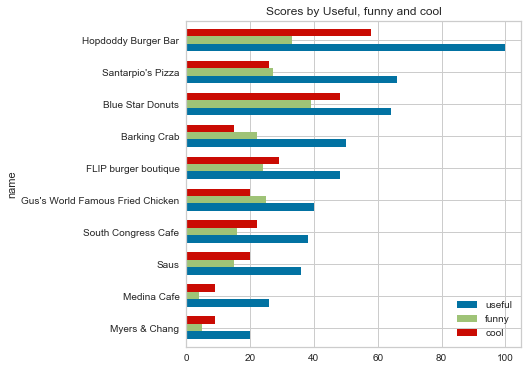

In [25]:
review_top_useful.plot(kind='barh', figsize=(6, 6),width=0.7)
plt.title('Scores by Useful, funny and cool');

In [26]:
available_review = review_bus.query("useful > 0 and cool > 0 and funny > 0")
print("Number of available reviews: ", len(available_review))

Number of available reviews:  1276


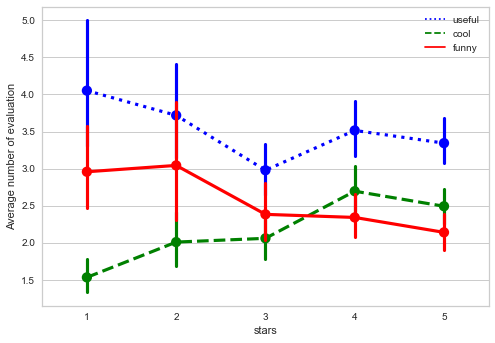

In [27]:
import matplotlib.lines as mlines
sns.pointplot(x = 'stars', y = 'useful', data = available_review, color="blue", linestyles='dotted')
sns.pointplot(x = 'stars', y = 'cool', data = available_review, color="green", linestyles='--')
sns.pointplot(x = 'stars', y = 'funny', data = available_review, color="red")
lg1 = mlines.Line2D([], [], color='blue', label='useful', linestyle='dotted')
lg2 = mlines.Line2D([], [], color='green', label='cool', linestyle='--')
lg3 = mlines.Line2D([], [], color='red', label='funny')
plt.ylabel('Average number of evaluation')
plt.legend(handles=[lg1, lg2, lg3]);

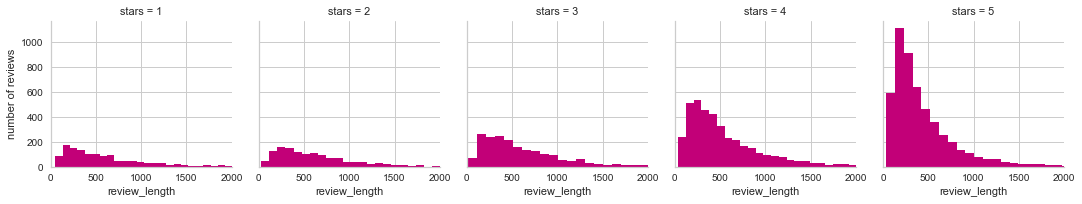

In [28]:
review_bus['review_length'] = review_bus.text.map(len)
ax = sns.FacetGrid(data=review_bus, col='stars', xlim=(0, 2000)).map(plt.hist, 'review_length', bins=50, color='xkcd:magenta')
ax.axes[0][0].set(ylabel='number of reviews');

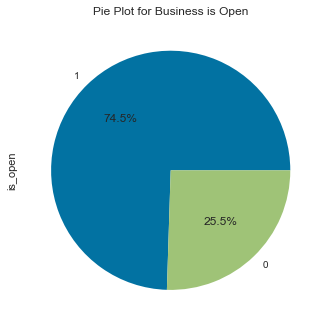

In [29]:
review_bus['is_open'].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%').set_title('Pie Plot for Business is Open');

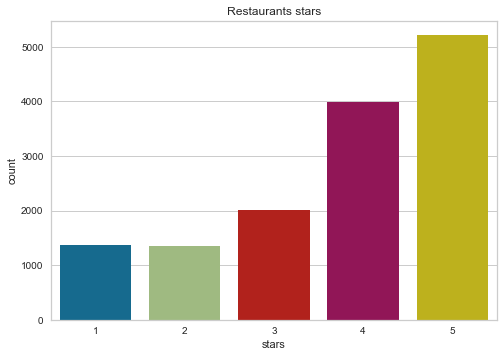

In [30]:
sns.countplot(x='stars', data=review_bus).set_title('Restaurants stars');

In [31]:
review_bus['word_count'] = review_bus['text'].apply(lambda x: len(str(x).split(" ")))
review_bus[['text','word_count', 'stars']].head()

,text,word_count,stars
0,Apparently Prides Osteria had a rough summer a...,322,4
3,I've stayed at many Marriott and Renaissance M...,71,2
4,The food is always great here. The service fro...,36,4
5,"This place used to be a cool, chill place. Now...",57,1
6,"The setting is perfectly adequate, and the foo...",35,2


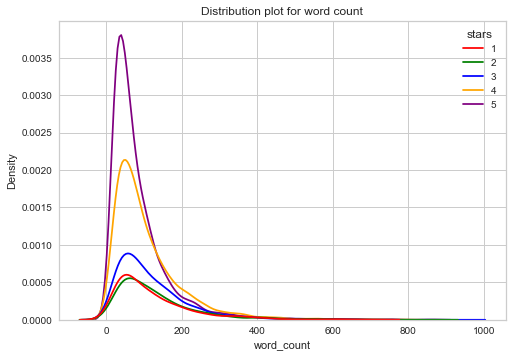

In [32]:
sns.kdeplot(x=review_bus['word_count'], hue=review_bus['stars'], 
            palette=['red', 'green', 'blue', 'orange', 'purple']).set_title('Distribution plot for word count');

In [33]:
stopword = stopwords.words('english')

review_bus['stopwords'] = review_bus['text'].apply(lambda x: len([x for x in x.split() if x in stopword]))
review_bus[['text','stopwords', 'stars']].head()

,text,stopwords,stars
0,Apparently Prides Osteria had a rough summer a...,133,4
3,I've stayed at many Marriott and Renaissance M...,36,2
4,The food is always great here. The service fro...,14,4
5,"This place used to be a cool, chill place. Now...",27,1
6,"The setting is perfectly adequate, and the foo...",11,2


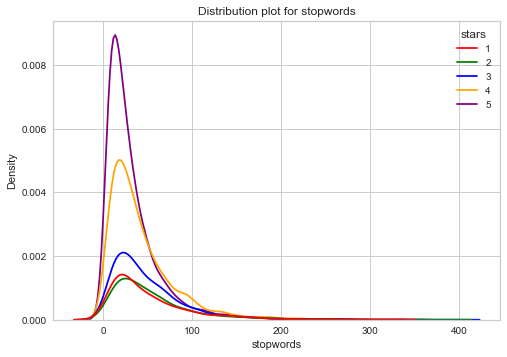

In [34]:
# distribution of the stopword in each review text
sns.kdeplot(x=review_bus['stopwords'], hue=review_bus['stars'], 
            palette=['red', 'green', 'blue', 'orange', 'purple']).set_title('Distribution plot for stopwords');

In [35]:
review_bus['char_count'] = review_bus['text'].str.len()
review_bus[['text','char_count', 'stars']].head()

,text,char_count,stars
0,Apparently Prides Osteria had a rough summer a...,1856,4
3,I've stayed at many Marriott and Renaissance M...,390,2
4,The food is always great here. The service fro...,181,4
5,"This place used to be a cool, chill place. Now...",301,1
6,"The setting is perfectly adequate, and the foo...",213,2


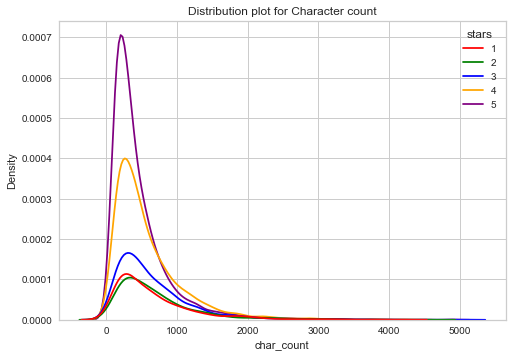

In [36]:
sns.kdeplot(x=review_bus['char_count'], hue=review_bus['stars'], palette=['red', 'green', 'blue', 'orange', 'purple']).set_title('Distribution plot for Character count');

### Preprocessing the text

In [37]:
def prep(word):
    return word.replace("_", " ")

In [38]:
# remove underscore from text
review_bus['text'] = review_bus['text'].apply(prep)

In [39]:
def preprocess(x):
    x = re.sub('[^a-z\s_]', '', x.lower()) # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally we combine all of these
stopwords = set(i).union(j)
review_bus['clean_text'] = review_bus['text'].apply(preprocess)

## Process of stemming

In [40]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

review_bus['clean_text'] = review_bus['clean_text'].apply(lambda text: stem_words(text))

### Process of Lemmatisation

In [41]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
def lem_words(text):
    return " ".join([lemma.lemmatize(word) for word in text.split()])

review_bus['clean_text'] = review_bus['clean_text'].apply(lambda text: lem_words(text))

### Get rid of adverbs

In [42]:
#import spacy

In [43]:
#nlp = spacy.load('en_core_web_sm') 
#excluded_tags = {"ADV"}

#sentences = review_bus['clean_text']
#new_sentences = []
#for sentence in sentences:
#    new_sentence = []
#    for token in nlp(sentence):
#        if token.pos_ not in excluded_tags:
#            new_sentence.append(token.text)
#   new_sentences.append(" ".join(new_sentence))

In [44]:
#new_sentences

In [45]:
#rev_df=pd.DataFrame(new_sentences, columns =['clean'])

In [46]:
#rev_df.head()

In [47]:
rev_df = pd.DataFrame({'clean': review_bus['clean_text']})

In [48]:
rev_df=rev_df.reset_index(drop=True)
rev_df.head()

,clean
0,appar pride osteria rough summer evidenc almos...
1,ive stay mani marriott renaiss marriott huge d...
2,food alway great servic manag well staff super...
3,place use cool chill place bunch neanderth bou...
4,set perfectli adequ food come close dine chain...


In [49]:
#rev_df.to_csv('rev.csv', index=False)

### TF-IDF with unigrams 

We will now apply the TF-IDF function, which is a numerical statistic intended to reflect the importance of a word for a document in a corpus by assigning each word in a document a score ranging from 0 to 1.

In [50]:
tfidf = TfidfVectorizer(min_df = 0.01, max_df = 0.10, max_features = 8000, stop_words = 'english', ngram_range = (1, 1))

In [51]:
X = tfidf.fit_transform(rev_df.clean)
words = tfidf.get_feature_names()

In [52]:
X.shape

(13946, 696)

### Plot the elbow curve

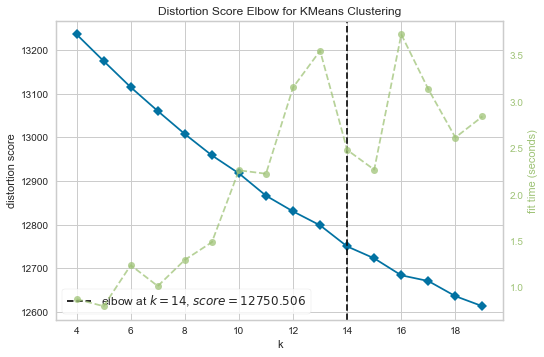

In [53]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

*Optimal cluster is 14*

In [54]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=14,init='k-means++',max_iter=200, n_init=1)

In [55]:
km.fit(X)

labels = km.labels_
centroids = km.cluster_centers_

In [56]:
terms = tfidf.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(14):
    print("cluster %d:" %i, end='')
    for ind in order_centroids[i,:30]:
        print(' %s' % terms[ind], end='')
    print()    

cluster 0: sushi roll qualiti fresh salmon tuna fish rice special lunch spici bar favorit spot decent avocado happi hour right quick enjoy awesom think bad bit dish averag soup excel noth
cluster 1: beer select bar lot game happi wing wine atmospher watch tv decent awesom burger hour fun cheap cool super list tasti enjoy sandwich spot bartend reason day music excel someth
cluster 2: dish rice sauc shrimp pork bean beef serv salad meat spici bit cook plate portion dinner fresh tasti chine fish star sweet soup disappoint small enjoy lot favorit bread everyth
cluster 3: sandwich chees fresh donut bread star sauc worth tasti salad meat hot everyth qualiti tea portion bad chocol sweet think fast disappoint way cream know small option ice use cake
cluster 4: lunch noodl pho soup broth salad roll bowl beef fresh portion buffet sandwich work dinner day special pork meat spici quick tasti hot rice lot locat area spring option bit
cluster 5: coffe shop cup sandwich tea day breakfast seat ice are

In [57]:
tfidf_rev = pd.DataFrame(data = X.toarray(), columns=tfidf.get_feature_names())
final_df = tfidf_rev

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

13946 rows


,0,1,2,3,4,5,6,7,8,9,...,13936,13937,13938,13939,13940,13941,13942,13943,13944,13945
room,0.281229,0.29816,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.220092,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dine,0.260167,0.00000,0.0,0.0,0.30233,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
split,0.229155,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.341034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prefer,0.221326,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pasta,0.212335,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

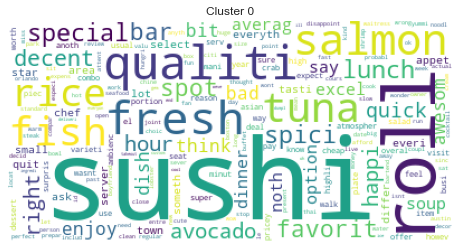

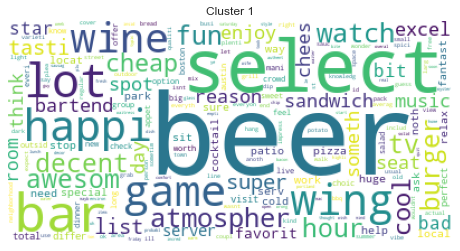

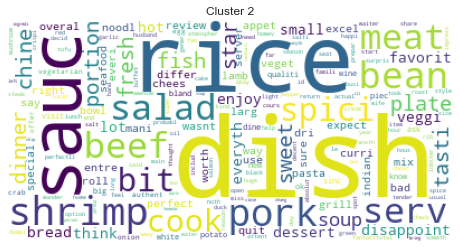

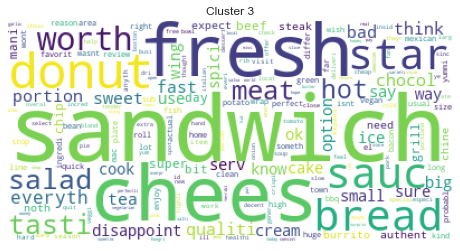

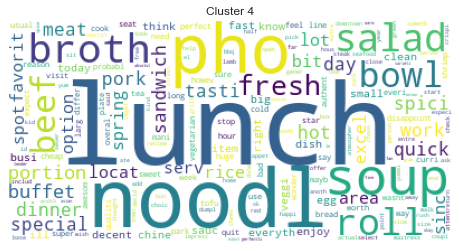

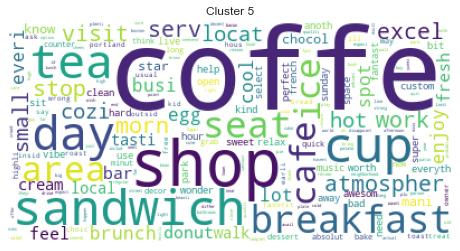

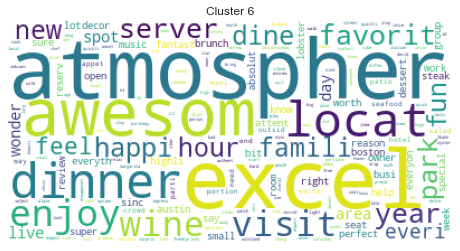

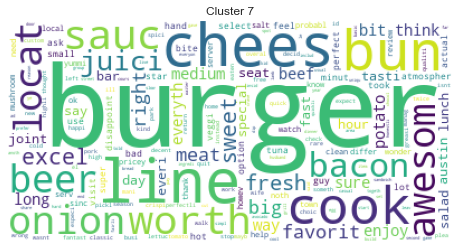

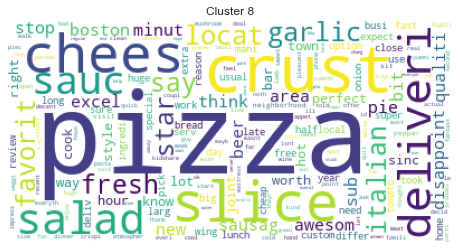

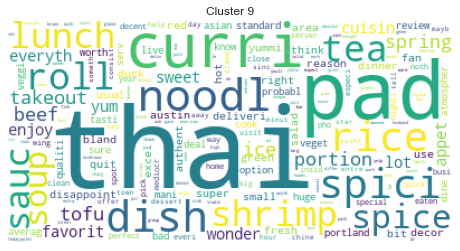

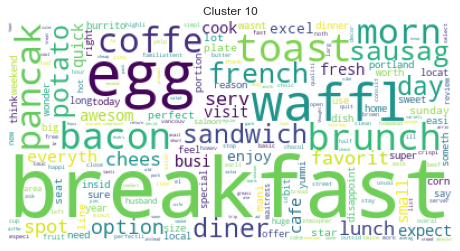

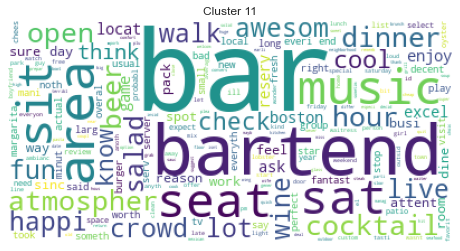

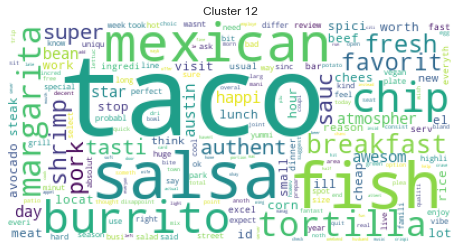

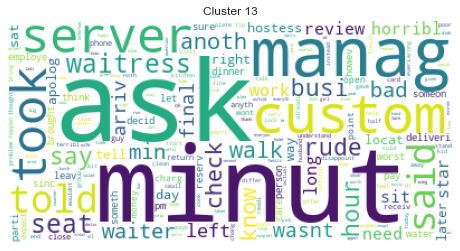

In [59]:
#Plot the word cloud for each cluster
centroids = pd.DataFrame(km.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

**We see that 'cluster 13' contains the words (customer  disatisfaction) like rude, bad**

* Now let's take a closer look at each cluster. So we'll first use a simple histogram to look at the most dominant    words in each cluster.

In [60]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tfidf.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

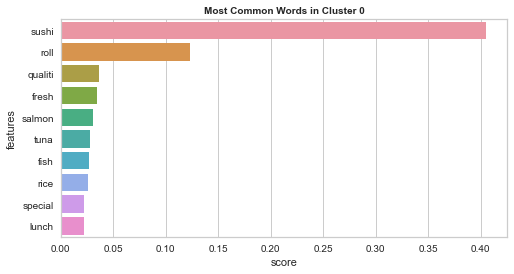

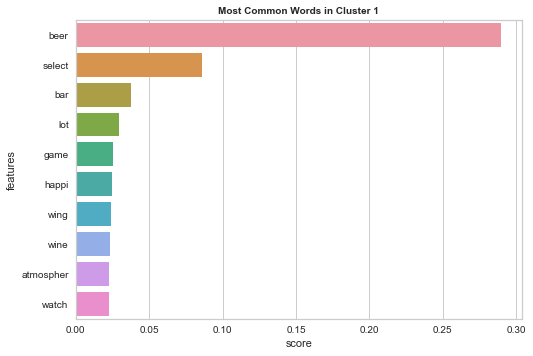

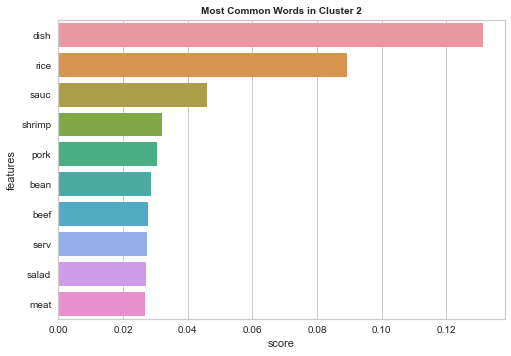

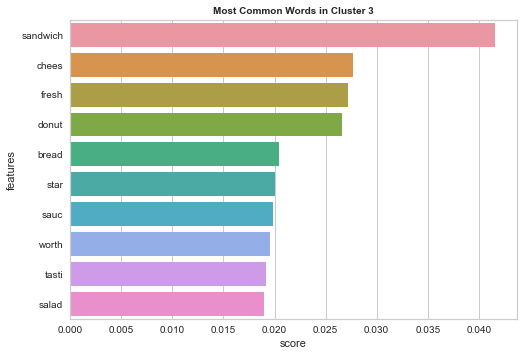

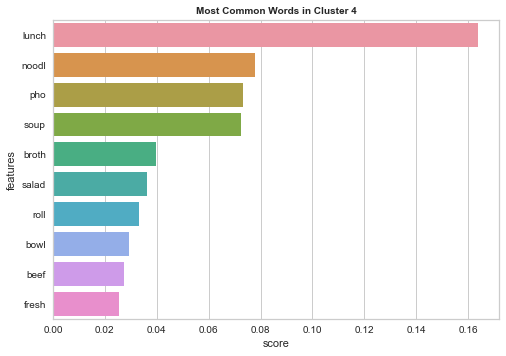

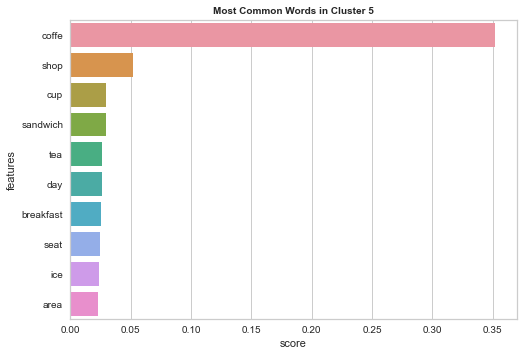

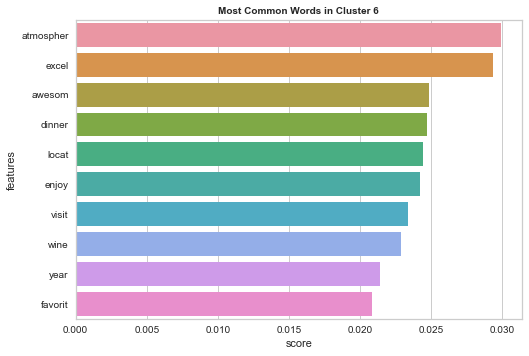

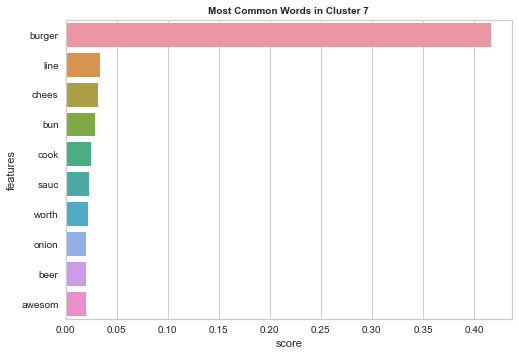

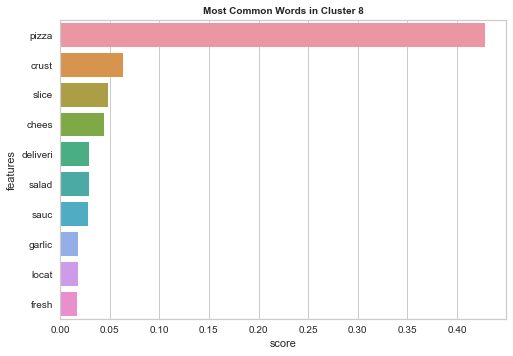

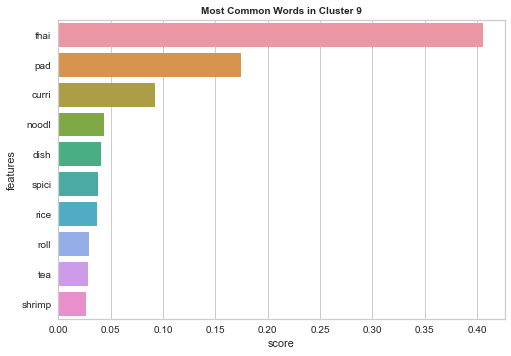

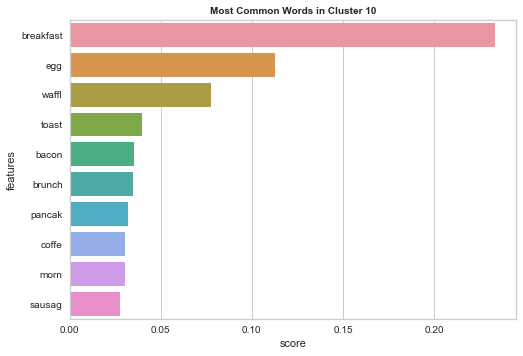

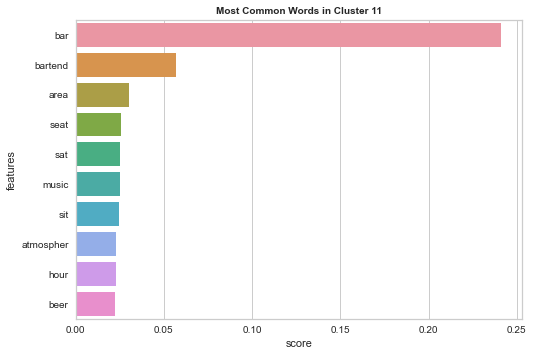

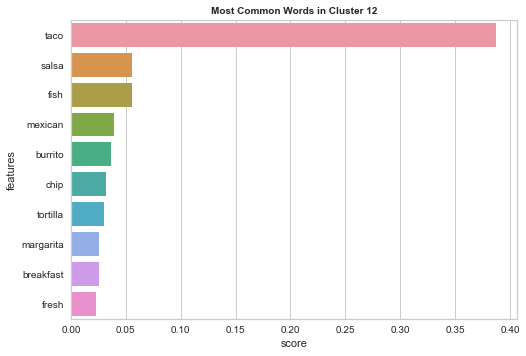

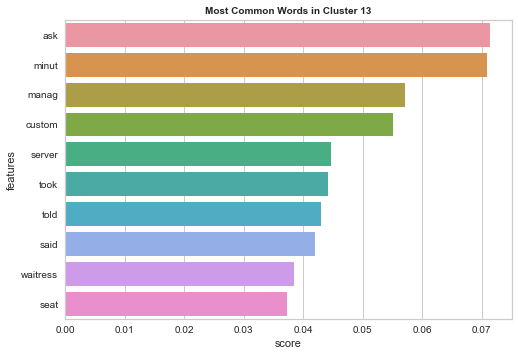

In [61]:
final_df_array = final_df.to_numpy()
prediction = km.predict(final_df)
n_feats = 10
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 10)

### Truncated SVD for visualisation of words

In [62]:
from collections import Counter

reindexed_data = rev_df['clean']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

## Function to return an integer list of predicted topic categories for the topic matrix
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis = 1).tolist()
    return keys

## Function to return a tuple of topic categories 
def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

## Function to return a list of n topics
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [63]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  food place good great servic order time like love realli
Topic 2:  great food servic love atmospher friendli staff amaz place recommend
Topic 3:  pizza crust good slice place chees best great order love
Topic 4:  pizza wait minut horribl hostess order time hour manag tabl
Topic 5:  burger fri great good place shake milkshak order line best
Topic 6:  good food servic realli price place decent portion pretti nice


### LDA for visualisation of words on the gensim corpus

In [80]:
def preprocess_review(rev_df):
    corpus = []
    for text in rev_df['clean']:
        words= text.split()
        corpus.append(words)
    return corpus

corpus = preprocess_review(rev_df)

### Creation of the  BOW

In [66]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [67]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.016*"order" + 0.014*"food" + 0.012*"time" + 0.011*"servic" + 0.010*"u" + 0.009*"get" + 0.008*"back" + 0.008*"wait" + 0.008*"go" + 0.007*"ask"'),
 (1,
  '0.017*"food" + 0.016*"place" + 0.015*"great" + 0.011*"taco" + 0.010*"good" + 0.009*"alway" + 0.008*"restaur" + 0.008*"go" + 0.007*"servic" + 0.007*"best"'),
 (2,
  '0.022*"good" + 0.021*"food" + 0.018*"pizza" + 0.017*"place" + 0.011*"great" + 0.010*"servic" + 0.010*"time" + 0.009*"get" + 0.009*"go" + 0.008*"like"'),
 (3,
  '0.016*"great" + 0.014*"good" + 0.012*"place" + 0.012*"food" + 0.008*"burger" + 0.008*"delici" + 0.008*"servic" + 0.008*"fri" + 0.007*"love" + 0.006*"realli"'),
 (4,
  '0.010*"place" + 0.009*"food" + 0.008*"get" + 0.008*"order" + 0.008*"good" + 0.007*"tabl" + 0.007*"like" + 0.007*"u" + 0.007*"coffe" + 0.007*"one"'),
 (5,
  '0.014*"good" + 0.011*"like" + 0.011*"food" + 0.009*"chicken" + 0.009*"order" + 0.009*"place" + 0.008*"rice" + 0.008*"tri" + 0.008*"dish" + 0.007*"flavor"')]

In [68]:
#import pyLDAvis
#import pyLDAvis.gensim_models

In [69]:
# Visualizing the topics
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
#vis

**Topic Modeling in LDA (Latent Dirichlet Allocation Skitlearn)**

In [70]:
rev_df.head()

,clean
0,appar pride osteria rough summer evidenc almos...
1,ive stay mani marriott renaiss marriott huge d...
2,food alway great servic manag well staff super...
3,place use cool chill place bunch neanderth bou...
4,set perfectli adequ food come close dine chain...


In [71]:
vect =TfidfVectorizer(stop_words=stopwords,max_features=1000, ngram_range = (1,1))
vect_text=vect.fit_transform(rev_df['clean'])

In [72]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=6, max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [73]:
print(lda_top.shape)

(13946, 6)


We can check the proportion of topics that have been assigned to the first document using the lines of code given below.

In [74]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  91.69579070050548 %
Topic  1 :  1.6612309860484744 %
Topic  2 :  1.6585571591730515 %
Topic  3 :  1.662754251187739 %
Topic  4 :  1.6605243380867694 %
Topic  5 :  1.6611425649984648 %


**Topic 1 & 5 are predominatly present in Document 0**

Let us check what are the top words that comprise the topics. This would give us a view of what defines each of these topics.

In [75]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    d=dict(sorted_words).keys()
    l=" ".join(str(key) for key in d)
    print("Topic "+str(i)+": ", l)

Topic 0:  food order good great place servic like go time delici
Topic 1:  great place good food go order time like servic get
Topic 2:  place good food great servic time like order one go
Topic 3:  good place great food pizza servic order one love time
Topic 4:  food great place good love servic get time like go
Topic 5:  good food place time order great get servic like realli
